#use shift + enter to execute a cell

In [4]:
#-----------------------------------------------General packages-----------------------------------------------------
%matplotlib notebook

from glob import glob


import numpy as np
import cv2
import pandas as pd
#------------------------------------ matplotlib is amain python package for plotting 
import matplotlib .pyplot as plt
import matplotlib.cm as cm
from matplotlib import style


import skimage

import tifffile

## for cropping images
import scipy
from scipy import ndimage as nd
##--------------------------------------------- machine learning libraries------------------------------------
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from skimage.filters import roberts, sobel, scharr, prewitt
from sklearn import metrics


#In this practical, you will use random forest to do a binary segmentation in which you want to seperate pores from matrix in the images.  

# Reading images

In [5]:
def image_plot_info(Raw_path, Segmented_path, plot_images=True, slice_number= 500):
    file_format= '/*.tif' 
    X_raw= tifffile.imread(Raw_path + file_format)
    Y_segmented= tifffile.imread(Segmented_path + file_format)
    
    #print image info
    print('Shape of Raw Training image:{}'.format(X_raw.shape))
    print('Shape of Segmented Training image:{}'.format(Y_segmented.shape))

    print('Min and Max values in all raw images: {}-{}'.format(X_raw.min(),X_raw.max()))
    print('Min and ax values in Segmented images: {}-{}'.format(Y_segmented.min(),Y_segmented.max()))
    print('Raw data type:{}'.format(X_raw.dtype))
    print('Segmented data type:{}'.format(Y_segmented.dtype))
    
    if plot_images:
        style.use('default')
        fig, ax = plt.subplots(nrows=2,ncols=1, figsize=(10,8), sharex=True, sharey=True)

        ax[0].imshow(X_raw[slice_number], cmap='gray')

        ax[1].imshow(Y_segmented[slice_number], cmap='gray')

        plt.tight_layout()
        plt.show()
    
    return X_raw, Y_segmented
   

#Here you give the path of training images. in the folder training images you have two folders: Raw images and Labelled_images. copy the directions within the r'' in the next cell.

Shape of Raw Training image:(3, 616, 568)
Shape of Segmented Training image:(3, 616, 568)
Min and Max values in all raw images: 0-255
Min and ax values in Segmented images: 0-1
Raw data type:uint8
Segmented data type:uint8


<IPython.core.display.Javascript object>


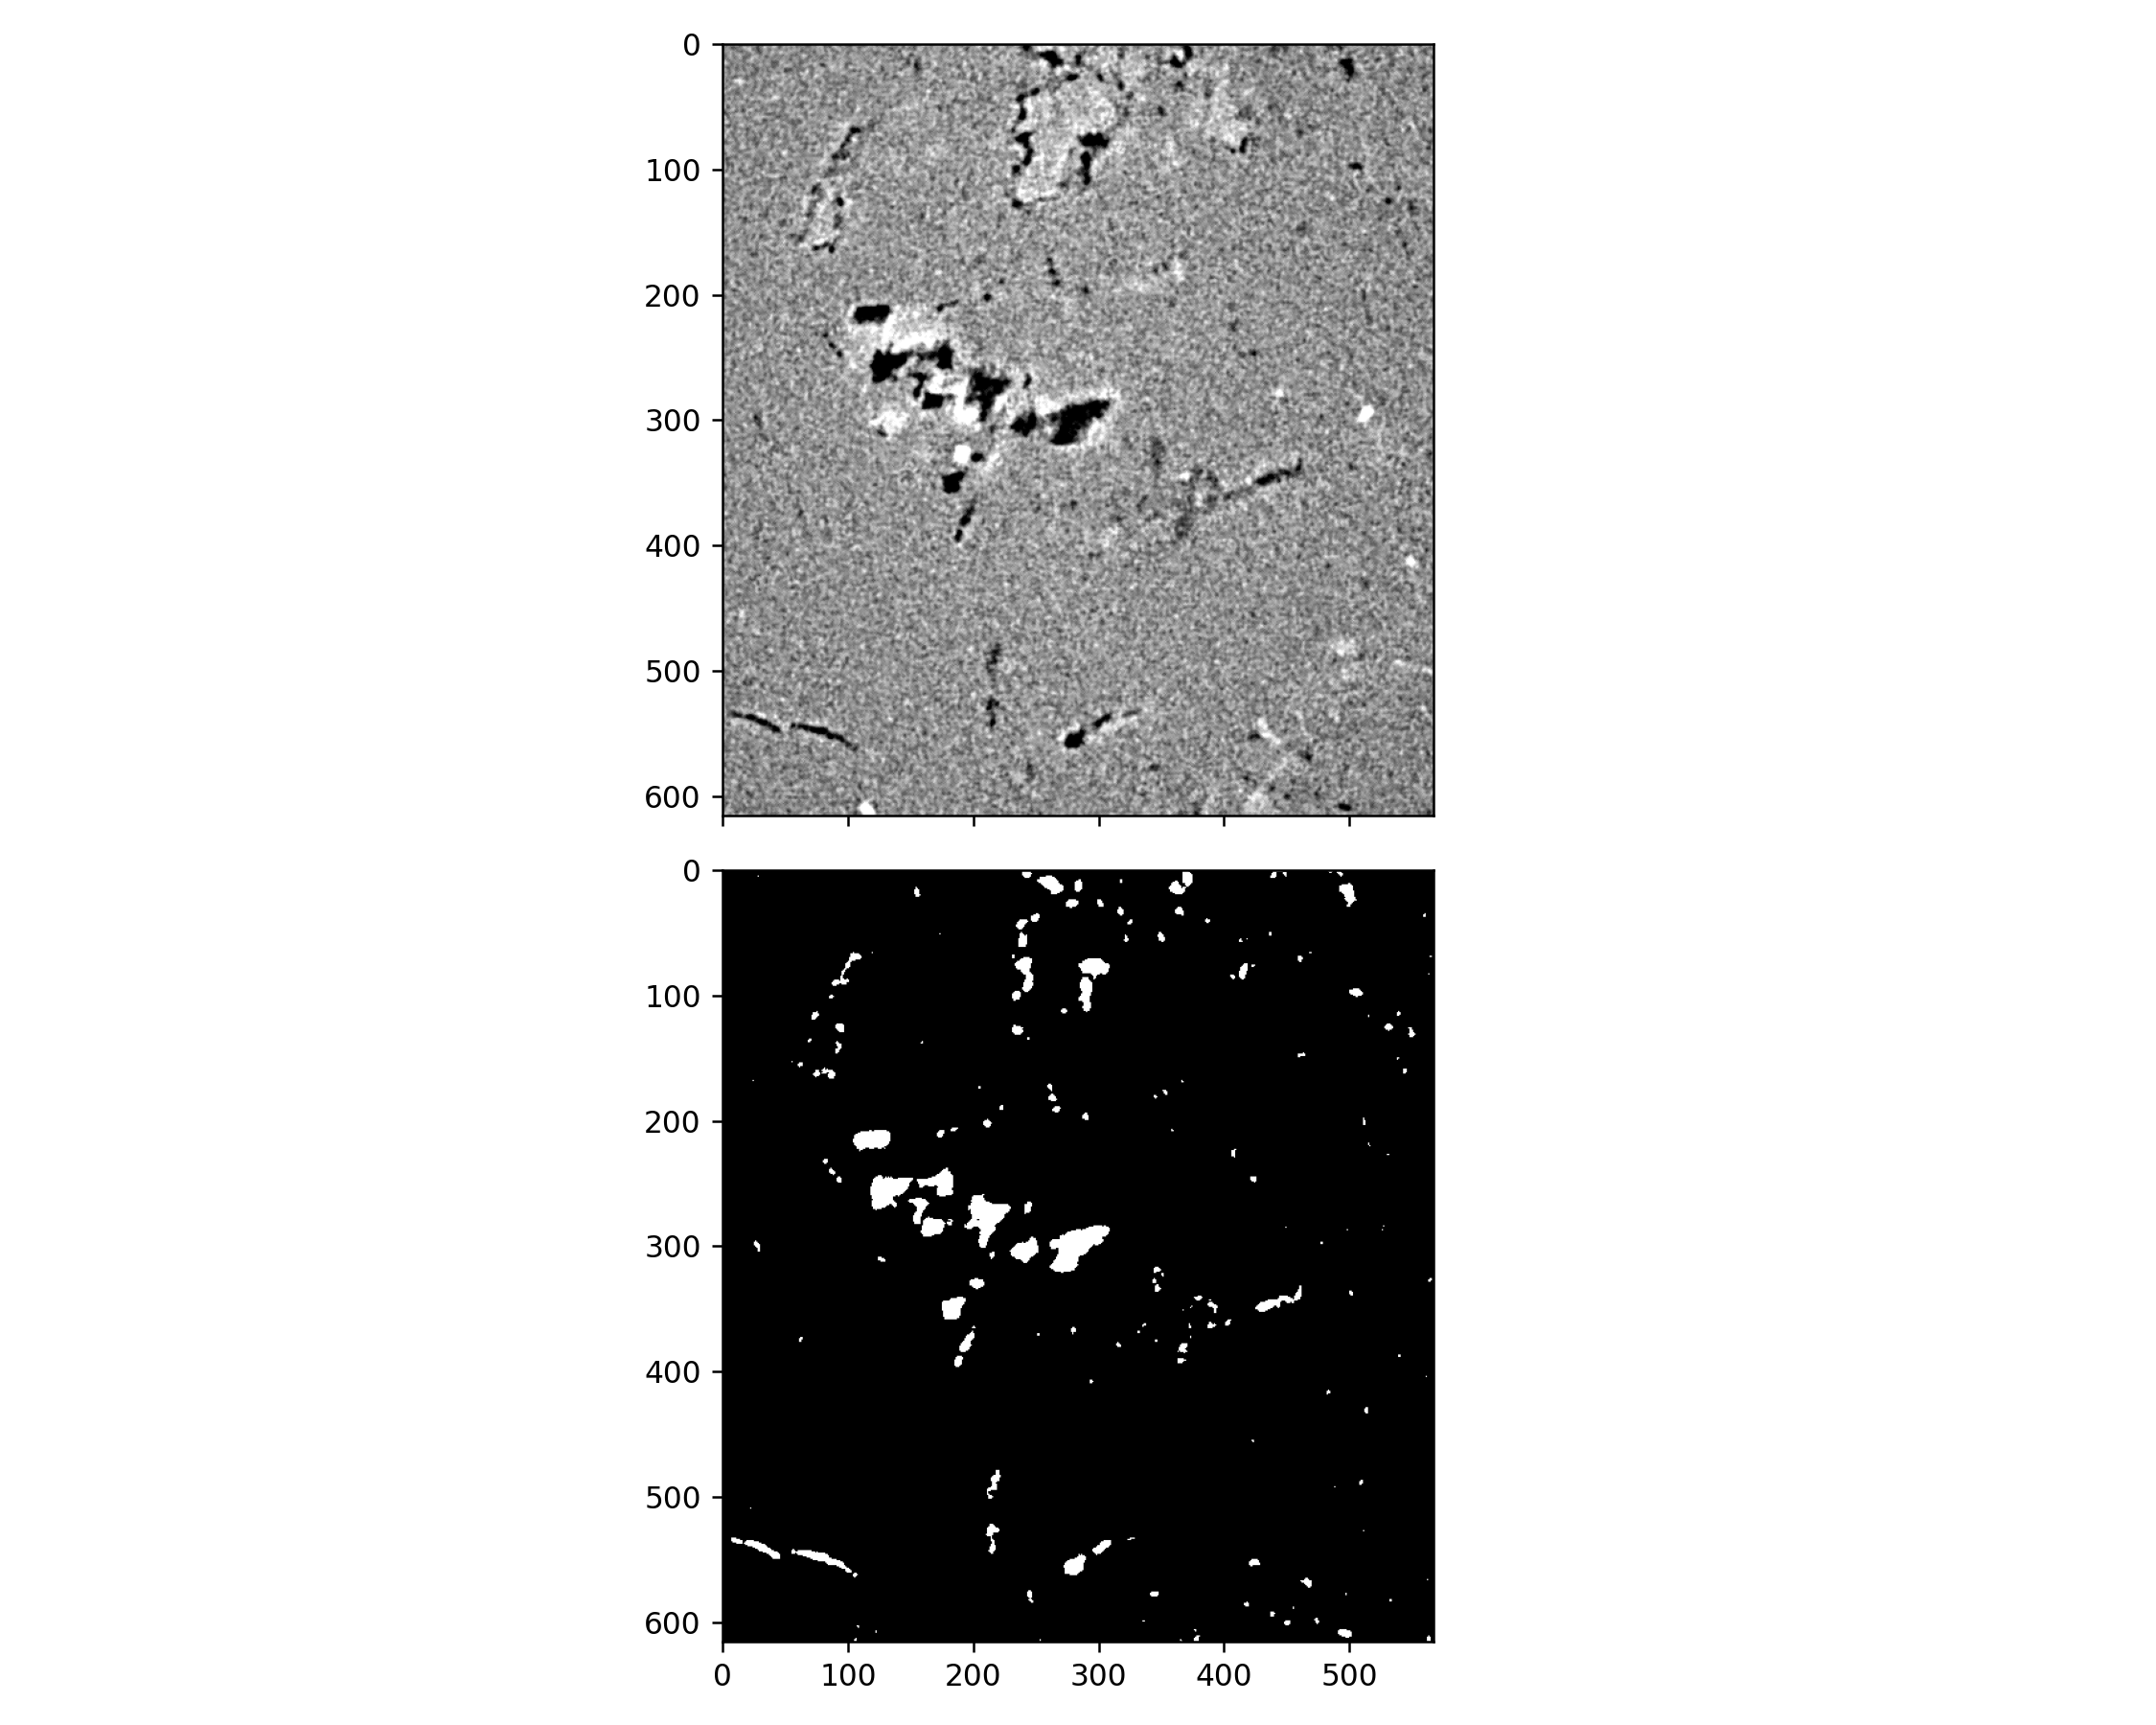

In [145]:
# after executing this cell you will the the shape of images which is equal to (3, 616, 568).
# 3 is the number of images. and the other two values are the number of pixels in y and x directions.
# you will also see the first raw and labelled images.
raw_path = r'D:\My PhD\Presentations\TA_introduction to machine learning\practical\Training images\Raw_images'
segmented_path= r'D:\Hamed\tonsbergite_XCT\TA_practical\LT35_SEG1_ROI2_550\Training images\Labelled_images'

raw_imgs, labels = image_plot_info(Raw_path= raw_path, Segmented_path= segmented_path, slice_number=0)

Here we extract features from the raw images

In [146]:
img = raw_imgs[0]

#Save original image pixels into a data frame. This is our Feature #1.
img2 = img.reshape(-1)
df = pd.DataFrame()
df['Original Image'] = img2

#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
#                print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                
#----------------------------------------------------------------------------------------
#Gerate OTHER FEATURES and add them to the data frame
                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe



#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [149]:
#Now, add a column in the data frame for the Labels
#For this, we need to import the labeled image
labeled_img = labels[0]
#Remember that you can load an image with partial labels 
#But, drop the rows with unlabeled data

# labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
labeled_img1 = labeled_img.reshape(-1)
df['Labels'] = labeled_img1
#--------------------------------------

#Define labels
Y = df["Labels"].values
#Define our features
X = df.drop(labels = ["Labels"], axis=1) 

#Split data into train and test to verify accuracy after fitting the model. 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)


# Ihere we create an instance version of a random fores models. n_estimators show the number of trees that we want.
model = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on training data
model.fit(X_train, y_train)


# TESTING THE MODEL BY PREDICTING ON TEST DATA----------------------------
#AND CALCULATE THE ACCURACY SCORE
#First test prediction on the training data itself. SHould be good. 
prediction_test_train = model.predict(X_train)

#Test prediction on testing data. 
prediction_test = model.predict(X_test)


#First check the accuracy on training data. This will be higher than test data prediction accuracy.
print ("Accuracy on training data = ", metrics.accuracy_score(y_train, prediction_test_train))
#Check accuracy on test dataset. If this is too low compared to train it indicates overfitting on training data.
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))


Accuracy on training data =  1.0
Accuracy =  0.9978207436622939


**Note:** this is a very simple example only two classes. and separating pores from matrix in this image is not complicated. that's why you see a very high accuracy. in practice when you have more images and for more complex problem you don't get that high accuracy!

here you can see the importance of each feature using random forest. the higher is the value, the more important is that feature.

In [150]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print('Importance of features:')
print(feature_imp)

Importance of features:
Median s3         0.188296
Gabor4            0.124403
Gabor8            0.099072
Gabor6            0.072164
Gabor24           0.071747
Gabor5            0.066645
Original Image    0.053549
Gabor11           0.050987
Gaussian s3       0.048567
Gabor7            0.032085
Sobel             0.023715
Gabor23           0.023658
Prewitt           0.021257
Scharr            0.021162
Gabor12           0.015155
Gabor20           0.013393
Gabor28           0.011482
Gabor22           0.011365
Gaussian s7       0.010925
Roberts           0.007860
Gabor29           0.005750
Gabor19           0.004204
Gabor21           0.003942
Gabor31           0.003920
Variance s3       0.003837
Gabor32           0.003385
Gabor30           0.003260
Gabor27           0.003018
Canny Edge        0.000950
Gabor3            0.000250
Gabor16           0.000000
Gabor1            0.000000
Gabor2            0.000000
Gabor18           0.000000
Gabor17           0.000000
Gabor15           0.000000
Gabo

<IPython.core.display.Javascript object>


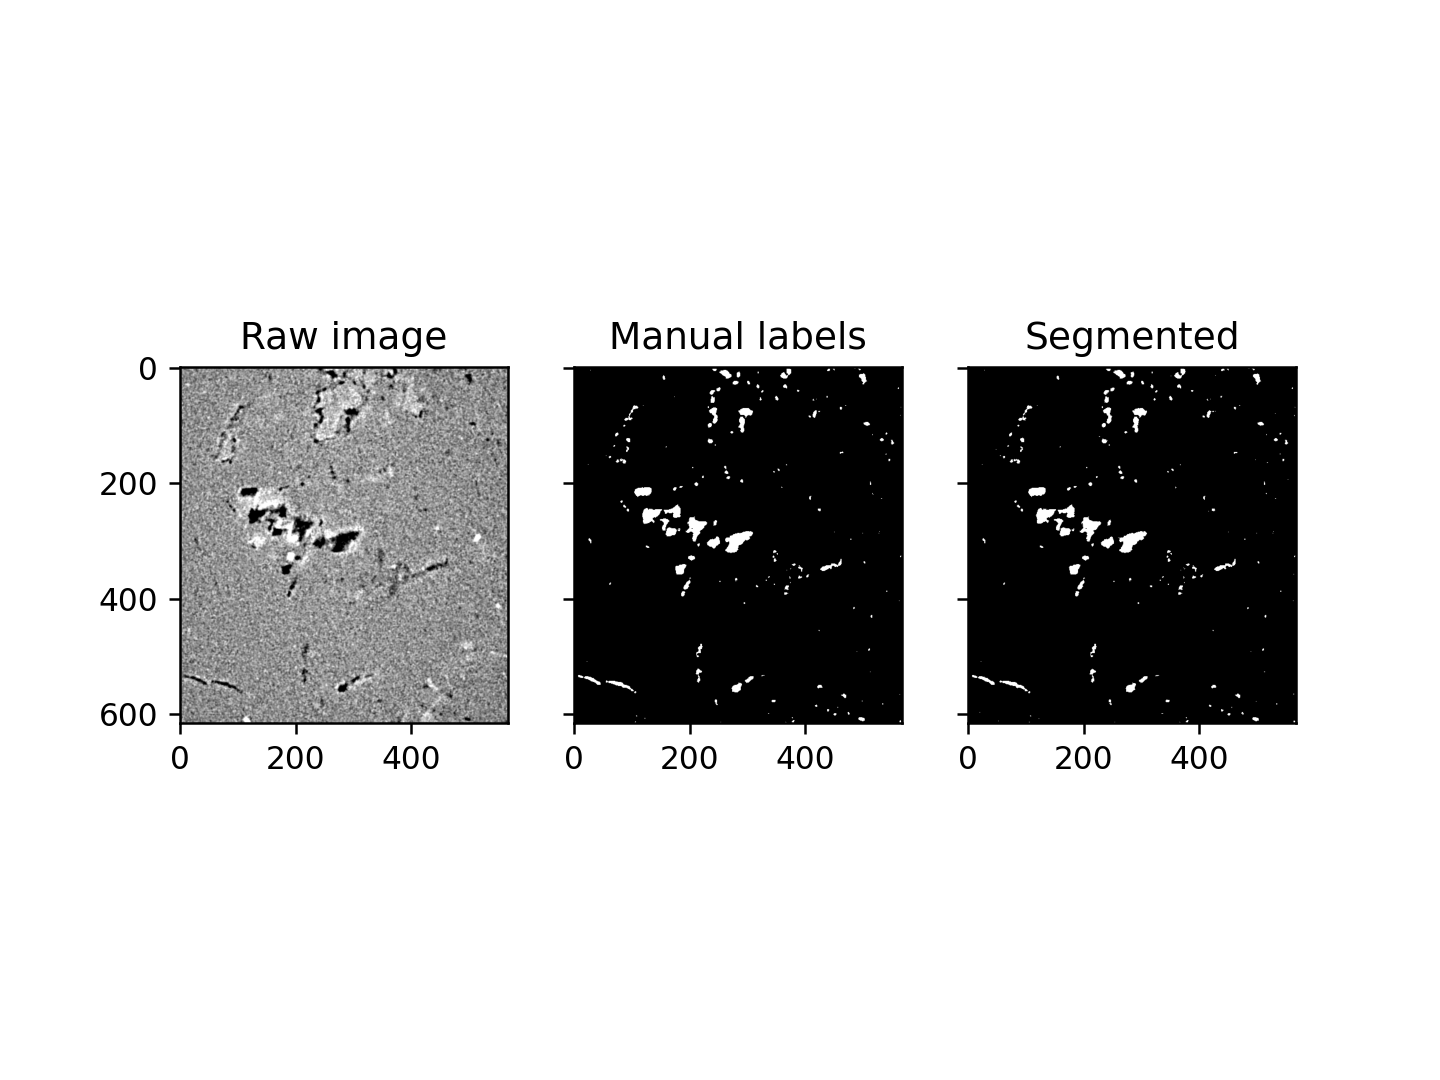

Text(0.5, 1.0, 'Segmented')

In [151]:
# here we can compare the raw image with true labelled 
segmented= model.predict(X).reshape((img.shape))
fig, ax = plt.subplots(nrows=1, ncols=3, sharex= True, sharey=True)
ax[0].imshow(img, cmap ='gray')
ax[0].set_title('Raw image')


ax[1].imshow(labeled_img, cmap ='gray')
ax[1].set_title('Manual labels')

ax[2].imshow(segmented, cmap ='gray')
ax[2].set_title('Segmented')



'''so far, we have trained a random forest using one image: raw image and the corresponding labelled image.
in the next section we use the trained model to segment the other images which are in the folder named "new_images"


# Use the trained model to segment new images


so if we want to used the trained random forest for segmenting new images. we need to extract exactly the same features from the new images. the following function takes an image and extract all the features from it.
'''


def feature_extraction(img):
    df = pd.DataFrame()


#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Original Image'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 0,255)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe


#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe


    return df


'''
here you again need to give some paths. the first one is the path to the folder named "New_images" in your computer.

**Note:** keep '\*.tif' at the end of the path. 

the segmented path is the the path that you want to save segmented images. create a new folder, name it "Segmented_images"

**Note:** don't remove the r before the path.'''

In [153]:
all_raw_images_path = r'D:\Hamed\tonsbergite_XCT\TA_practical\LT35_SEG1_ROI2_550\New_images\*.tif'
segmented_path = r'D:\Hamed\tonsbergite_XCT\TA_practical\LT35_SEG1_ROI2_550\Segmented_images'
slice_number= 0
for file in glob(all_raw_images_path):
    
    
#     print(file)
    img = tifffile.imread(file)
#     print(img.min(), img.max())
#     Call the feature extraction function.
    X = feature_extraction(img)
#     result = loaded_model.predict(X)
    segmented = model.predict(X).reshape((img.shape))
    
    file_name = f'/{slice_number}.tif'
    tifffile.imsave(segmented_path + file_name, segmented)
    
    slice_number +=1
    



'''when it's finished, go to the segmented images folder and compare the raw image and the segmented images.
**note**: if you cannot see anything in segmented images (dark images), you need to open it with imageJ software and adjust contrast and brightness as explained in the video.'''




100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [09:59<00:00, 11.99s/it]
